In [63]:
import numpy as np
import math,copy
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

 The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below. Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

Size(sqft)	Number of Bedrooms	Number of floors	Age of Home	    Price (1000s dollars)
2104	            5	                1	            45	                460
1416	            3	                2	            40	                232
852	                2	                1	            35	                178


In [2]:
x_train=np.array([[2104,5,1,45],[1416,3,2,40],[852,2,1,35]])
y_train=np.array([460,232,178])

#taking some initial values of b and w
b_init = 785.1811367994083
w_init = np.array([0.39133535,18.75376741,-53.36032453,-26.42131618])

In [8]:
#Single Prediction
def predict_single_loop(x,w,b):
    
    p=np.dot(w,x)+b
        
    return p

In [9]:
x_test=x_train[0]
print(x_test)

f_wb=predict_single_loop(x_test,w_init,b_init)
print(f'Prediction of Price:{f_wb}')

[2104    5    1   45]
Prediction of Price:459.9999976194083


In [11]:
#Computing cost with multiple variables

def compute_cost(x,y,w,b):
    m=len(x)
    J_wb=0
    for i in range(m):
        f_wb_i=np.dot(x[i],w)+b
        J_wb=J_wb+(f_wb_i-y[i])**2
    
    J_wb=J_wb/(2*m)
    
    return J_wb


In [13]:
cost=compute_cost(x_train,y_train,w_init,b_init)
print(f'Cost at optimal w={cost}')

Cost at optimal w=1.5578904428966628e-12


In [26]:
#Computing gradient
def compute_gradient(x,y,w,b):
    m,n=x.shape
    dJ_dw=np.zeros(n)
    dJ_db=0
    
    for i in range(m):
        f_wb_i=np.dot(x[i],w)+b
        error=f_wb_i-y[i]
        
        for j in range(n):
            dJ_dw[j]=dJ_dw[j]+error*x[i][j]
        dJ_db=dJ_db+error
    
    dJ_dw=dJ_dw/m
    dJ_db=dJ_db/m
    
    return dJ_db,dJ_dw

In [33]:
dJ_db,dJ_dw=compute_gradient(x_train,y_train,w_init,b_init)
print(f'dJ_db={dJ_db}',f'dJ_dw={dJ_dw}')

dJ_db=-1.6739251501955248e-06 dJ_dw=[-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


GRADIENT DESCENT WITH MULTIPLE VARIABLES

In [34]:
def gradient_descent(x,y,w_in,b_in,a,n,cost_function,gradient_function):
    J_history=[]
    w=copy.deepcopy(w_in)
    b=b_in
    
    for i in range(n):
        dJ_db,dJ_dw=gradient_function(x,y,w,b)
        
        w=w-a*dJ_dw
        b=b-a*dJ_db
        
        if(i<999999):
            J_history.append(cost_function(x,y,w,b))
            
    return w,b,J_history


In [56]:
#Initialising parameters to run gradient descent
w=np.zeros_like(w_init)
b=0
n=10000
a=5.0e-7

print(f'w={w}')

w=[0. 0. 0. 0.]


In [57]:
w_final,b_final,J_history=gradient_descent(x_train,y_train,w,b,a,n,compute_cost,compute_gradient)
print(f'w_final={w_final}\nb_final={b_final}')

w_final=[ 0.22  0.03 -0.11 -0.58]
b_final=-0.019077710470483206


In [58]:
#Checking the predictions
for i in range((len(x_train))):
    print(f'Prediction:{np.dot(x_train[i],w_final)},Targeted Value:{y_train[i]}')

Prediction:430.5213783500644,Targeted Value:460
Prediction:283.95358567800037,Targeted Value:232
Prediction:164.54119307559225,Targeted Value:178


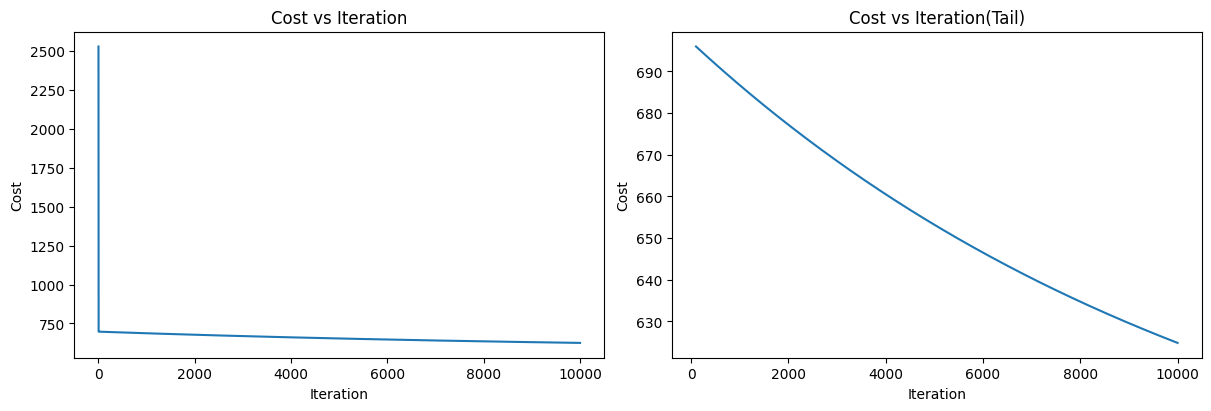

In [61]:
fig,(ax1,ax2)=plt.subplots(1,2,constrained_layout=True,figsize=(12,4))
ax1.plot(J_history)
ax2.plot(100+np.arange(len(J_history[100:])),J_history[100:])
ax1.set_title('Cost vs Iteration')
ax2.set_title('Cost vs Iteration(Tail)')
ax1.set_xlabel('Iteration')
ax2.set_xlabel('Iteration')
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
plt.show()

In Multiple Regression, we can do feature scaling to execute the code faster. Due to multiple features, each feature having different ranges of values, the computing is sometimes slow and innacurate. This can be solved by feature scaling

In [65]:
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc

In [108]:
x_train,y_train=load_house_data()
x_features=['Size(sqft)','Bedrooms','Floors','Age']

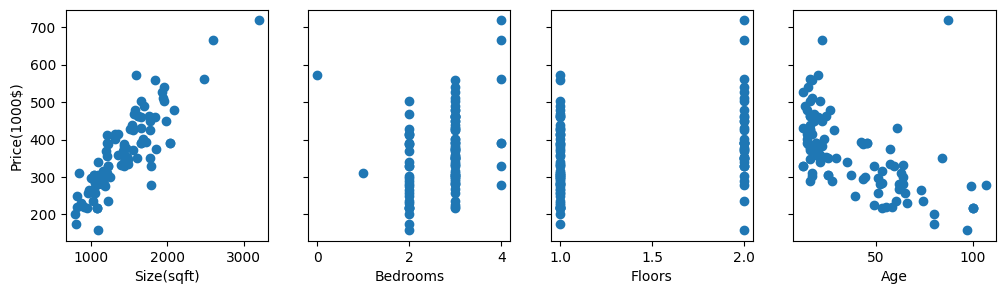

In [111]:
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(x_features[i])
    
ax[0].set_ylabel('Price(1000$)')
plt.show()

In [112]:
#Scaling the data
def zscore_normal_features(x):
    x_mean=np.mean(x,axis=0)
    x_std=np.std(x,axis=0)
    
    x_norm=(x-x_mean)/x_std
    
    return x_norm,x_mean,x_std

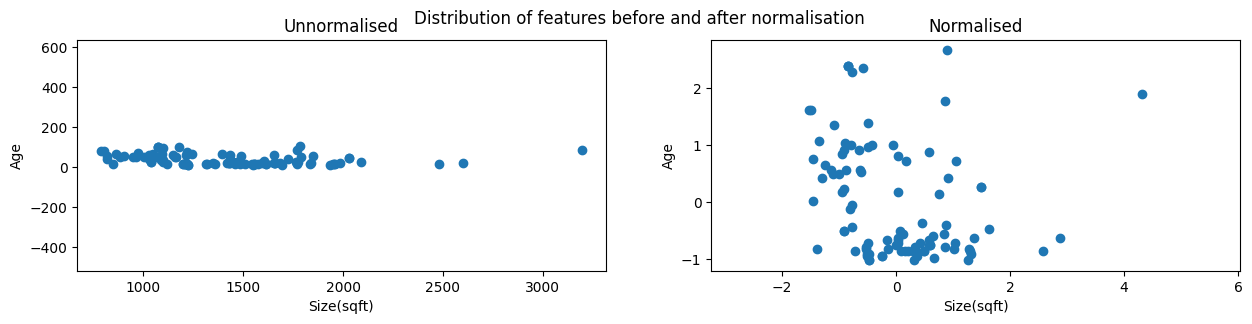

In [127]:
x_mean=np.mean(x_train,axis=0)
x_std=np.std(x_train,axis=0)
x_norm=(x-x_mean)/x_std

fig,ax=plt.subplots(1,2,figsize=(15,3))
ax[0].scatter(x_train[:,0],x_train[:,3])
ax[0].set_xlabel(x_features[0])
ax[0].set_ylabel(x_features[3])
ax[0].axis('equal')
ax[0].set_title('Unnormalised')

ax[1].scatter(x_norm[:,0],x_norm[:,3])
ax[1].set_xlabel(x_features[0])
ax[1].set_ylabel(x_features[3])
ax[1].axis('equal')
ax[1].set_title('Normalised')

fig.suptitle('Distribution of features before and after normalisation')

plt.show()

In [129]:
w_norm, b_norm, hist = run_gradient_descent(x_norm, y_train, 1000, 1.0e-1, )

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.6e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e-09 -

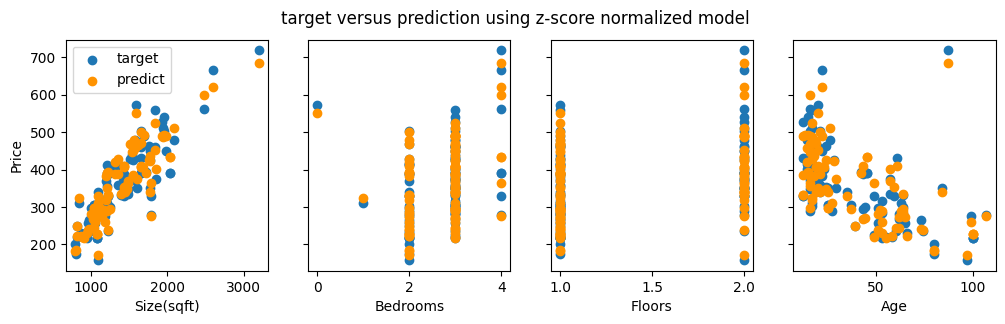

In [131]:
#predict target using normalized features
m = x_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(x_norm[i], w_norm) + b_norm

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_train[:,i],yp,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

 The point of generating our model is to use it to predict housing prices that are not in the data set. Let's predict the price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old. Recall, that the data must be normalized with the mean and standard deviation derived when the training data was normalized.

In [134]:
# First, normalize out example.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house-x_mean)/x_std
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict:0.0f}k")

[-0.53  0.43 -0.79  0.06]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $319k
